### The Maze of Mysteries 

In [1]:
import numpy as np
import numpy.random as rd

import time
import matplotlib.pyplot as plt

In [2]:
class maze_gen:
    def __init__(self, rows, cols, startPos, endPos, Rseed = None):
        self.rows = 2 * rows + 1
        self.cols = 2 * cols + 1

        self.startPos = startPos
        self.endPos = endPos

        self.maze = None
        rd.seed(Rseed)

    def prob(self, p) -> bool:
        return rd.random() < p

    def __str__(self):
        return str(self.maze)

    def Eller_maze_generator(self, p1 = 0.5, p2 = 0.1):
        '''
        Eller's algorithm\n  
        https://weblog.jamisbuck.org/2010/12/29/maze-generation-eller-s-algorithm
        '''
        current_num = 1
        self.maze = - np.ones((self.rows, self.cols))

        i = -1
        while(True):
            i += 2
            if(i < self.rows - 2):
                current_set = np.zeros(self.cols // 2).tolist()

                j = -1
                while(True):
                    j += 2
                    if(j < self.cols - 1):
                        # assign sets to new cell
                        if(self.maze[i, j] == -1):
                            self.maze[i, j] = current_num
                            current_set[j // 2] = current_num

                            current_num += 1
                        else:
                            current_set[j // 2] = self.maze[i, j]
                    else:
                        break

                #print(1, current_set)

                j = -1
                while(True):
                    j += 2
                    if(j < self.cols - 1):
                        # merge neighbours based on random
                        if(j <= self.cols - 3 and self.maze[i, j] != self.maze[i, j + 2] and self.prob(p1)):
                            self.maze[i, j + 1] = self.maze[i, j]
                            self.maze[i, j + 2] = self.maze[i, j]

                            current_set[j // 2] = self.maze[i, j]
                    else:
                        break

                #print(2, current_set)

                j = self.cols
                while(True):

                    j -= 2
                    if(j > 0):
                        # make Unique the ladders
                        if(self.maze[i, j] in current_set):
                            val = self.maze[i, j]

                            index = current_set.index(val)
                            freq = current_set.count(val)
                            Rn = rd.randint(0, freq - 1)
                            #print(index, freq, Rn, val)

                            index = (index + Rn) * 2 + 1

                            self.maze[i + 1, index] = self.maze[i, j]
                            self.maze[i + 2, index] = self.maze[i, j]
                            
                            current_set = [x if x != val else 0 for x in current_set]

                        # if allowed
                        elif(self.prob(p2)):
                            self.maze[i + 1, j] = self.maze[i, j]
                            self.maze[i + 2, j] = self.maze[i, j]
                    else:
                        break

            elif(i == self.rows - 2):

                j = -1
                while(True):
                    j += 2
                    if(j < self.cols - 1):
                        # if empty cells
                        if(self.maze[i, j] == -1):
                            self.maze[i, j] = current_num
                            current_num += 1

                        # merge neighbours for last row
                        if(j <= self.cols - 3 and self.maze[i, j] != self.maze[i, j + 2]):
                            self.maze[i, j + 1] = self.maze[i, j]
                    else:
                        break
            else:
                break

        self.maze[self.maze > 0] = 0 
        self.maze[self.maze < 0] = 1

        self.maze[self.startPos[0], self.startPos[1]] = 5
        self.maze[self.endPos[0], self.endPos[1]] = 3

In [3]:
m_size = 6

mz = maze_gen(m_size, m_size, (1,1), (1, 2 * m_size - 1), 42)
mz.Eller_maze_generator(p1= 0.3, p2= 0.7)
print(mz)

ValueError: high <= 0

In [21]:
# Define the directions for moving in the grid (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
visit_num = 0

def valid_path(x, y, visited, x_max, y_max):
    if((x,y) not in visited):
        if 0 <= x <= x_max and 0 <= y <= y_max:
            return True
    return False

def DFS(maze : np.ndarray, startPos, endPos, visited, allPaths = [], path = []):
    visit_num = 0

    path.append(startPos)
    if(startPos == endPos):
        allPaths.append(path.copy())
        return visit_num
    
    # Mark the current cell as visited
    visited.add(startPos)


    # Explore all 4 directions (up, down, left, right)
    for direction in directions:
        new_x, new_y = startPos[0] + direction[0], startPos[1] + direction[1]
        if valid_path(new_x, new_y, visited, maze.shape[0] - 1, maze.shape[1] - 1):
            if(maze[new_x, new_y] != 1):
                #print((new_x, new_y))
                visit_num += 1 + DFS(maze, (new_x, new_y), endPos, visited, allPaths, path)
            
    # Backtrack
    path.pop()
    visited.remove(startPos)

    return visit_num

In [22]:
allPaths = []
paths = []
visited = set()

input_maze = [
    [1, 1, 1, 1, 1, 1], 
    [1, 5, 0, 1, 1, 1], 
    [1, 1, 0, 1, 0, 1], 
    [1, 1, 0, 0, 1, 1], 
    [1, 1, 1, 0, 3, 1],
    [1, 1, 1, 1, 1, 1]
]

visit_num = DFS(np.array(input_maze), (1,1), (4, 4), visited, allPaths, paths)

#visit_num = DFS(mz.maze, mz.startPos, mz.endPos, visited, allPaths, paths)
#print(allPaths)

if(len(allPaths) >= 1):
    pathnodes = allPaths[0]     #[]
    pathlength = len(pathnodes) #np.inf

    '''for paths in allPaths:
        #print(paths)
        if(len(paths) < pathlength):
            pathlength = len(paths)
            pathnodes = paths'''

    print(f"number of visited cells is the maze: {visit_num}")
    print("Congratulations, brave adventurer! You've found the treasure! Here's the path you took:")
    print(f"{pathnodes}") 
    print(f"path length: {pathlength}")
else:
    print("No path found")

number of visited cells is the maze: 6
Congratulations, brave adventurer! You've found the treasure! Here's the path you took:
[(1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)]
path length: 7


### Questions:
##### Modify the problem to find all solution paths. (done)

##### Does DFS always find the optimal path? Why or why not?

The optimal path is typically the shortest path (in terms of cost or distance). 
DFS doesn't check all possibilities at the same time whenever it can branch, thus easily misses shorter paths unless it happens to explore that path first.
- This makes DFS unsuitable for finding the shortest or most optimal path.

##### How does the density of walls affect the DFS algorithm's performance? 

Shorter maze corridors will allow the dfs to backtrack much faster leading to faster elimination of branches. This will help in speed up of the dfs. 
- Thus dense walls ie shorter corridors will improve performance.

#####  How does backtracking affect the runtime for larger mazes? 

In [23]:
size_range = 20
test_range = 1000

t_vals = []

for i in range(1, size_range):
    new_mz = maze_gen(i, i, (1,1), (1, 2 * i - 1))

    t_avg : np.float32 = 1.0e-9
    for n in range(test_range):
        new_mz.Eller_maze_generator(p1 = 0.3, p2 = 0)

        allPaths.clear()
        paths.clear()
        visited.clear()

        t1 = time.time()
        DFS(new_mz.maze, new_mz.startPos, new_mz.endPos, visited, allPaths, paths)
        t2 = time.time()

        t_avg += (t2 - t1) / test_range
    
    t_vals.append(t_avg)
    print(f"for mazes of {i}x{i} time = {t_avg} secs")

for mazes of 1x1 time = 1e-09 secs
for mazes of 2x2 time = 1.8028544021606447e-05 secs
for mazes of 3x3 time = 7.0311115814209e-05 secs
for mazes of 4x4 time = 0.0001359601484069824 secs
for mazes of 5x5 time = 0.00016356043679809575 secs
for mazes of 6x6 time = 0.00028886608941650364 secs
for mazes of 7x7 time = 0.0004702263341674805 secs
for mazes of 8x8 time = 0.00039860420091247524 secs
for mazes of 9x9 time = 0.0006812186704406737 secs
for mazes of 10x10 time = 0.0008554006086120618 secs
for mazes of 11x11 time = 0.0011122537122497562 secs
for mazes of 12x12 time = 0.0013981464372406 secs
for mazes of 13x13 time = 0.0016135366426239031 secs
for mazes of 14x14 time = 0.0019068320260772723 secs
for mazes of 15x15 time = 0.0022670882211456313 secs
for mazes of 16x16 time = 0.002259716795516969 secs
for mazes of 17x17 time = 0.002567113207412719 secs
for mazes of 18x18 time = 0.0032677195535430934 secs
for mazes of 19x19 time = 0.0033066785798797644 secs


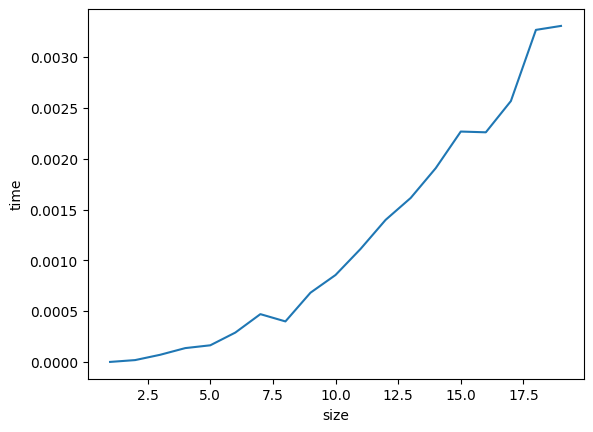

In [25]:
x = [i for i in range(1, size_range)]

plt.plot(x, t_vals)
plt.xlabel("size")
plt.ylabel("time (secs)")
plt.show()